# LAB 3:
- ## DFT
- ## Z-tranform
- ## Inverse Z-transform
- ## Pole-Zero plot

----------



## TASK 1:
- ## Program to find DFT and IDFT of a 4 point sequence

-----------


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    x_n=input("Enter the 4 point sequence x[n] ")
    x_n=[int(i) for i in x_n.split(",")]
    if len(x_n)!=4:
        raise Exception("Input sequence must have exactly 4 points")
except Exception as e:
    print(e)
    exit()

In [15]:
x_n=np.array(x_n)
print(x_n)

In [3]:
X_K=np.fft.fft(x_n)
print("DFT of the sequence x[n] : ")
print(X_K)



DFT of the sequence x[n] : 
[ 6.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [4]:
x_n_reconstructed=np.fft.ifft(X_K)
print("Reconstructed sequence x[n] from IDFT:  ")
print(x_n_reconstructed)

Reconstructed sequence x[n] from IDFT:  
[0.+0.j 1.+0.j 2.+0.j 3.+0.j]


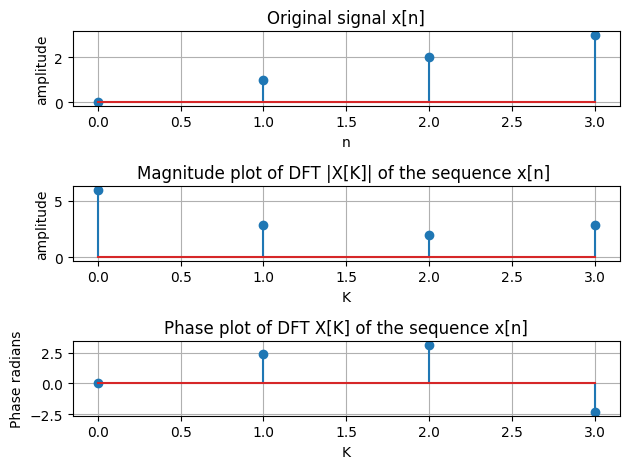

In [5]:
# original signal
plt.subplot(3,1,1)
n=np.arange(0,4,1)
plt.stem(n,x_n)
plt.title("Original signal x[n]")
plt.grid()
plt.xlabel("n")
plt.ylabel("amplitude")

#Magnitude plot of DFT |X[K]| of the sequence x[n]
plt.subplot(3,1,2)
plt.title("Magnitude plot of DFT |X[K]| of the sequence x[n] ")
plt.xlabel("K")
plt.ylabel("amplitude")
plt.stem(n,np.abs(X_K))
plt.grid()

#Phase plot of DFT X[K] of the sequence x[n]

plt.subplot(3,1,3)
plt.title("Phase plot of DFT X[K] of the sequence x[n]")
plt.stem(n,np.angle(X_K))
plt.xlabel("K")
plt.ylabel("Phase radians")
plt.grid()

plt.tight_layout()
plt.show()

# TASK 2: 
- ## Create an analog signal with component frequency at 15Hz and 40 Hz with sampling frequency=200Hz.Using FFT analysis ,show its Mangnitude and Phase in graph.


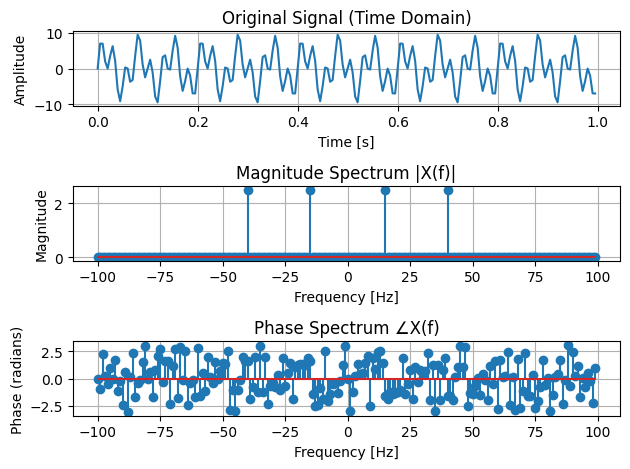

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fm1 = 15  # Hz
fm2 = 40  # Hz
fs = 200  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second of signal
pi = np.pi

# Original composite signal
x = 5 * np.sin(2 * pi * fm1 * t) + 5 * np.sin(2 * pi * fm2 * t)

# FFT analysis
N = len(x)
X = np.fft.fft(x)
X_mag = np.abs(X) / N  # Normalize magnitude
X_phase = np.angle(X)
f = np.fft.fftfreq(N, d=1/fs)  # Frequency axis

# Shifting  for visualization
X_mag_shifted = np.fft.fftshift(X_mag)
X_phase_shifted = np.fft.fftshift(X_phase)
f_shifted = np.fft.fftshift(f)

# Plotting original signal
# plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title("Original Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()

# Plotting Magnitude Spectrum
plt.subplot(3, 1, 2)
plt.stem(f_shifted, X_mag_shifted)
plt.title("Magnitude Spectrum |X(f)|")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()

# Plotting  Phase Spectrum
plt.subplot(3, 1, 3)
plt.stem(f_shifted, X_phase_shifted)
plt.title("Phase Spectrum ∠X(f)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()


# TASK 3:
- ## finding Z-transform

In [ ]:
import sympy as sp

# Defining symbols
n, z = sp.symbols('n z', integer=True)

# Defining the signal x[n] = (1/4)^n * u[n]
x_n = (1/4)**n

# Computing the infinite sum for Z-transform directly and force evaluation
Z_sum = sp.summation(x_n * z**(-n), (n, 0, sp.oo)).doit()

# Multiplying  by z to remove negative powers and simplify
X_z = sp.simplify(z * Z_sum)

print("Z-transform X(z):", X_z)


Z-transform X(z): z*Sum(0.25**n/z**n, (n, 0, oo))


# TASK 4:
- ## Basic function structure



In [16]:
def addNumbers(a,b):
    sum=a+b
    return sum

result=addNumbers(5,3)
print(f"The sum is {result} ")


The sum is 8 


## Function to convert Çelsius to Fahrenheit

In [17]:
def Temperature(x):
    temperature=(x-32)*5/9
    return temperature

result=Temperature(90)
print(f"the converted temperature is {result} ")

the converted temperature is 32.22222222222222 


## Function to calculate area and radius of circle

In [19]:
import numpy as np

def circle(radius):
    area = np.pi * (radius ** 2)
    perimeter = 2 * np.pi * radius
    return area, perimeter

area, perimeter = circle(5)
print(f"The area of circle is {area} and perimeter is {perimeter}")


The area of circle is 78.53981633974483 and perimeter is 31.41592653589793


# TASK 6:
- ## to plot-zero plot,frequency response,stability check and impulse response of a transfer function.

System is Stable ✅


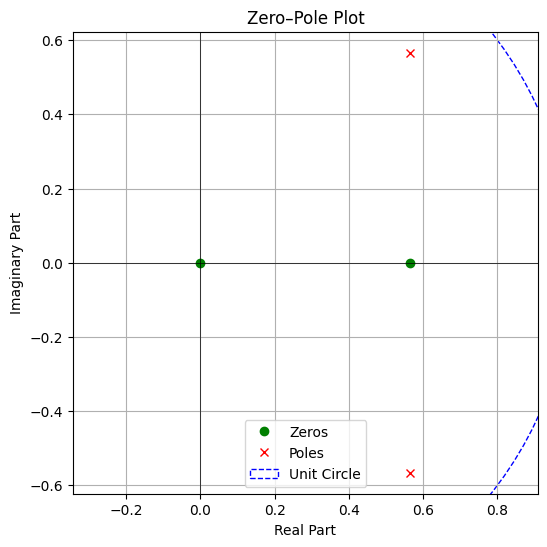

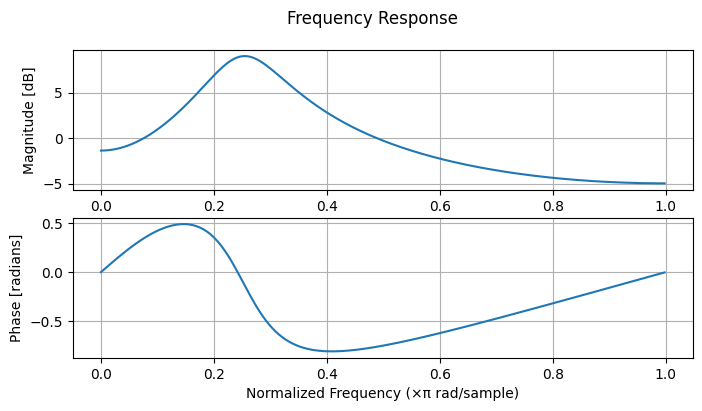

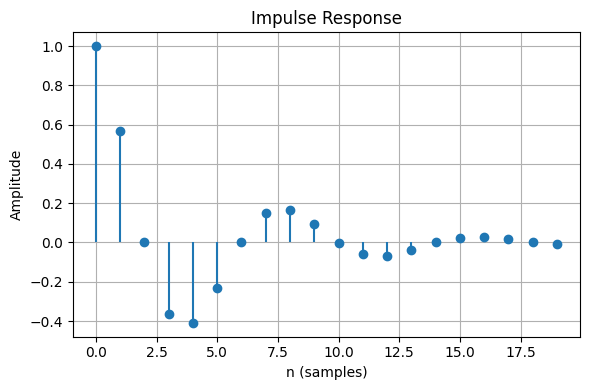

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Transfer function coefficients
n = [1, -0.565, 0]
d = [1, -1.131, 0.64]

# 1. Zero-Pole-Gain representation
z, p, k = signal.tf2zpk(n, d)

# 2. Zero-pole plot
plt.figure(figsize=(6,6))
plt.title("Zero–Pole Plot")
plt.plot(np.real(z), np.imag(z), 'go', label='Zeros')
plt.plot(np.real(p), np.imag(p), 'rx', label='Poles')
unit_circle = plt.Circle((0,0), 1, color='blue', fill=False, ls='--', label='Unit Circle')
plt.gca().add_artist(unit_circle)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.axis('equal')
plt.legend()
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')

# 3. Frequency response
w, h = signal.freqz(n, d)
plt.figure(figsize=(8,4))
plt.suptitle("Frequency Response")
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.subplot(2,1,2)
plt.plot(w/np.pi, np.angle(h))
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Phase [radians]')
plt.grid()

# 4. Stability check
stable = np.all(np.abs(p) < 1)
print("System is", "Stable ✅" if stable else "Unstable ❌")

# 5. Impulse response
impulse = np.zeros(20)
impulse[0] = 1
t = np.arange(20)
response = signal.lfilter(n, d, impulse)

plt.figure(figsize=(6,4))
plt.title("Impulse Response")
plt.stem(t, response, basefmt=" ")
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()
